### Descripción del Problema ###
---

La pobreza y la desigualdad son temas de gran relevancia que se tratan dentro de la economía, pues teniendo en cuenta que el eje de la misma ciencia son las personas y sus relaciones sociales de consumo y acumulación, la pobreza como un fenómeno descrito según Salinas (2006) como la falta o carencia de recursos para acceder a los bienes y servicios que satisfacen las necesidades básicas, es decir aquellas elementos mínimos indispensables que los seres humanos necesitan para vivir, en ese orden de ideas la existencia de pobreza implica la incapacidad de satisfacer las necesidades mínimas, dado quee estas son simultáneas, es decir que todas son necesarias a la vez y complementarias, lo que implica que si no puede subsanarse una necesidad básica a pesar de poder satisfacer las otras seguira existiendo un estado donde no se alcanze un nivel mínimo de bienestar. 

Otra definición de pobreza según Sen (2000), la pobreza se puede definir como la privación de capacidades básicas y no exlusivamente la falta de ingresos, las capacidades se definen como la capacidad de lograr el dessarrollo humano en base a las libertades de los individuos que definen sus objetivos y propósitos para alcanzar lo que llaman los estoicos la virtud o la "Buena vida", en este caso la concepción de pobreza al no depender unicamente del nivel ingreso, implica que la presencia de insatisfacción, de coerción o una libertad insuficiente implican condiciones de pobreza también independientemente del nivel de ingreso.

Por otra parte, otro elemento relevante dentro del análisis de la pobreza desde la perspectiva económica es la existencia de dos cuestiones: La existencia y acumulación de capital humano permiten mejorar la produtividad de los individuos y se espera que el retorno sea proporcional a esta, por otra parte la transmisión intergeneracional de pobreza y las trampas de pobreza, estas implican la existencia de condiciones que impiden romper los circulos de pobreza en los hogares, es decir el acceso limitado al crédito y los mercados de capitales y la exclusión de los pobres en el mercado dada su incapacidad de poder adquisitivo para acceder al mismo, de esta manera la marginación social y económica, las trampas de pobreza y las condiciones sociales de la misma como enfermar más, tener peores niveles de salud, nutrición, acceso a servicios públicos y en general la participación de las instituciones que satisfacen necesidades básicas como la salud en el marco privado han generado un incremento en la desigualdad respecto al acceso y calidad de los servicios de salud, perjudicando a las personas más vulnerables dado que deben afrontar altos costos de transacción en estos servicios en términos de espera, atención oportuna y control de enfermedades crónicas o agudas que pueden tener repercusiones en los niveles de salud futura y por ende en su nivel de capital humano intertemporal.

En base a esta descripción se buscará generar una segmentación de hospitales por zonas dadas otras variables económicas descriptivas de tal manera que se pueda segmentar zonas con baja densidad de servicios hospitalarios que tengan indicadores económicos que sugieran la presencia de precariedad y/o pobreza multidimensional, de tal manera que sea un insumo para la detección de lugares vulnerables en Bogotá en términos de atención hospitalaria y con indices que muestran alta presencia de pobreza, así se puedan tomar decisiones de política pública para los incrementos en la oferta en salud en lugares de riesgo de presencia de pobreza.



### Descripción de los Datos ###
---

- Utilizaremos variables como localidades en Bogotá, la presencia de los distintos estratos dentro de cada una es decir una clasificación socieconómica de las personas que viven en cada localidad, donde el estrato 1 es el más bajo es decir en estos lugares habitan personas en condición de pobreza mientras que el estrato 6 habitan las personas que mayor nivel de ingreso o riqueza tienen en Bogotá. Se utilizan datos perfil de localidades Bogotá 2020 de la cámara de comercio.

- Realizaremos una exploración de hospitales dentro de cada localidad a un área de 2km de esta manera, intentaremos obtener una aproximación de los niveles de acceso a la salud por localidad. En este caso usaremos datos obtenidos de la API de foursquare.

- Sin embargo es importante recalcar que dado que el marco legal restringe el acceso a hospitales en forma de afiliación a sistema de salud y la asignación de sedes de atención médica, no necesariamente  manzanas con alta densidad de servicios médicos implican un alto acceso a servicios de salud para las personas que viven en esas zonas, al menos para personas con una alta sensibilidad al precio en los niveles de salud, es decir las personas de los estratos mas bajos (1,2 y 3).

- Finalmente usaremos variables sobre el nivel de pobreza multidimensional para categorias de educación, niñez y juventud, trabajo, salud y vivienda por localidad, que podrían brindar información adicional sobre la perpecepción multidimensional de la pobreza y como esta puede asociarse o no a la densidad del servicio de salud a nivel geográfico.

In [73]:
!pip install tabula-py
!pip install contexto
!pip install matplotlib
import pandas as pd
import numpy as np

#
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud
import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans
import folium # librería para graficar mapas 
import  tabula

print('Libraries importadas.')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Libraries importadas.


In [74]:
# Obtención de Datos 
import requests 
from bs4 import BeautifulSoup
from contexto.limpieza import *

#Datos de georeferencia de localidades de Bogotá
datos_localidades = pd.read_csv('georeferencia-puntual-por-localidad.csv',sep = ';')
datos_localidades = datos_localidades.drop(['gp', 'CODIGO'], axis = 1)

#Rutina de Limpieza de texto
def limpieza(texto):
  texto_limpio = limpieza_texto(texto, quitar_acentos=True, quitar_numeros=False)
  return texto_limpio

# Convertiremos todo a minúsculas
name_localidades = datos_localidades['LOCALIDAD'].tolist()
name_localidades = list(map(limpieza, name_localidades))
datos_localidades.head()

,LOCALIDAD,LONGITUD,LATITUD
0,PUENTE ARANDA,-74.12270,4.61490
1,USAQUÉN,-74.03120,4.74850
2,BOGOTÁ,-74.08175,4.60971
3,BOSA,-74.19450,4.63050
4,CIUDAD BOLÍVAR,-74.15390,4.50660


In [75]:
# Creación de nuevo dataset corregido
datos = {'localidad':name_localidades, 'longitud':datos_localidades['LONGITUD'].tolist(),
                     'latitud':datos_localidades['LATITUD'].tolist()}

In [76]:
datos_localidades = pd.DataFrame.from_dict(datos)
datos_localidades.head(5)

,localidad,longitud,latitud
0,puente aranda,-74.12270,4.61490
1,usaquen,-74.03120,4.74850
2,bogota,-74.08175,4.60971
3,bosa,-74.19450,4.63050
4,ciudad bolivar,-74.15390,4.50660


In [77]:
datos_localidades.shape

(21, 3)

In [78]:
# Extraemos la tabla de indicadores de pobreza multidimensional por localidad en bogotá
# de un archivo pdf
import tabula 
url = 'localidades_bogota.pdf'
pandas_options = {'header':True, 'encoding' : 'latin1'}

#
pobreza_multidimensional = tabula.read_pdf(url, pages = 20 ,pandas_options=pandas_options)

Got stderr: Jul 18, 2022 7:59:32 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jul 18, 2022 7:59:34 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [79]:
pobreza_multidimensional = pobreza_multidimensional[0].iloc[2:]

#Cambiar nombres del dataframe de pobreza multidimensional
pobreza_multidimensional = {'localidad':pobreza_multidimensional['Localidad'].tolist(),
                            'educacion':pobreza_multidimensional['Educación'].tolist(),
                            'niñez y juventud':pobreza_multidimensional['Unnamed: 0'].tolist(),
                            'trabajo':pobreza_multidimensional['Trabajo'].tolist(),
                            'salud':pobreza_multidimensional['Salud'].tolist(),
                            'vivienda':pobreza_multidimensional['Vivienda'].tolist(),
                            'total':pobreza_multidimensional['Total'].tolist()}



In [80]:
pobreza_multidimensional = pd.DataFrame.from_dict(pobreza_multidimensional)

# Cambiar las comas de las variables numericas a puntos y cambiarlas a tipo flotante
for variable in pobreza_multidimensional.columns[1:]:
  pobreza_multidimensional[str(variable)] = pobreza_multidimensional[str(variable)].str.replace(',', '.').astype(float)

#Limpiamos el texto de la variable localidad
localidad = list(map(limpieza, pobreza_multidimensional['localidad'].tolist()))
pobreza_multidimensional['localidad'] = localidad

In [81]:
pobreza_multidimensional

,localidad,educacion,niñez y juventud,trabajo,salud,vivienda,total
0,usme,42.6,35.1,17.4,70.1,7.2,10.9
1,ciudad bolivar,39.5,32.1,16.6,69.5,8.6,8.9
2,santa fe,29.8,19.7,15.3,65.7,6.4,7.8
3,san cristobal,36.1,29.3,15.8,66.2,7.7,6.8
4,bosa,33.7,32.3,18.1,63.7,4.7,6.6
5,kennedy,23.2,27.2,15.3,60.0,3.6,5.3
6,la candelaria,17.2,14.7,14.4,61.7,4.6,5.0


In [82]:
pobreza_multidimensional_1 = tabula.read_pdf(url, pages = 21, pandas_options = pandas_options)

In [83]:
pobreza_multidimensional_1 = pobreza_multidimensional_1[0].iloc[2:]

#Corregimos los nombres de las columnas
pobreza_multidimensional_1.columns = ['localidad','educacion','niñez y juventud','trabajo','salud','vivienda','total']

#Cambiamos todas las comas por puntos y las variables cuantitativas a flotantes
for variable in pobreza_multidimensional_1.columns[1:]:
  pobreza_multidimensional_1[str(variable)] = pobreza_multidimensional_1[str(variable)].str.replace(',', '.').astype(float)

#Limpiamos el texto de la variable localidad
localidad = list(map(limpieza, pobreza_multidimensional_1['localidad'].tolist()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
pobreza_multidimensional_1['localidad'] = localidad

In [85]:
# Unimos ambas tablas 
pobreza_multidimensional = pd.concat([pobreza_multidimensional,pobreza_multidimensional_1], ignore_index=True)
pobreza_multidimensional = pobreza_multidimensional.drop([8]).reset_index(drop=True)

In [86]:
# Cargamos los datos de estrato socioeconómico
datos_estrato = pd.read_csv('estratos_bogota.csv', decimal = '.').drop(['Unnamed: 8'], axis = 1)
datos_estrato.head()

,localidad,sin estrato,estrato 1,estrato 2,estrato 3,estrato 4,estrato 5,estrato 6
0,usaquen,12.92,5.33,12.79,22.87,14.80,13.49,17.81
1,chapinero,12.92,9.09,12.57,5.17,18.54,11.59,30.12
2,santa fe,12.91,8.10,55.44,18.73,4.81,0.00,0.00
3,san cristobal,12.30,7.23,71.29,9.18,0.00,0.00,0.00
4,usme,16.36,52.11,31.52,0.00,0.00,0.00,0.00


In [87]:
# Verificamos que las variables cuantitativas sean variables de tipo flotante
datos_estrato.dtypes

localidad       object
sin estrato    float64
estrato 1      float64
estrato 2      float64
estrato 3      float64
estrato 4      float64
estrato 5      float64
estrato 6      float64
dtype: object

In [88]:
# Verificamos que los datos cuantitativos sean variables de tipo flotante
pobreza_multidimensional.dtypes

localidad            object
educacion           float64
niñez y juventud    float64
trabajo             float64
salud               float64
vivienda            float64
total               float64
dtype: object

### Análisis Exploratorio ###
---

In [89]:
# Utilizamos matplotlib en su versión 3.1.1 para poder visualizar en google colab
!pip uninstall matplotlib
!pip install matplotlib==3.1.1

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pa

###  Gráfico 1: Distribución de la pobreza multidimensional en las distintas localidades de bogotá ###
---

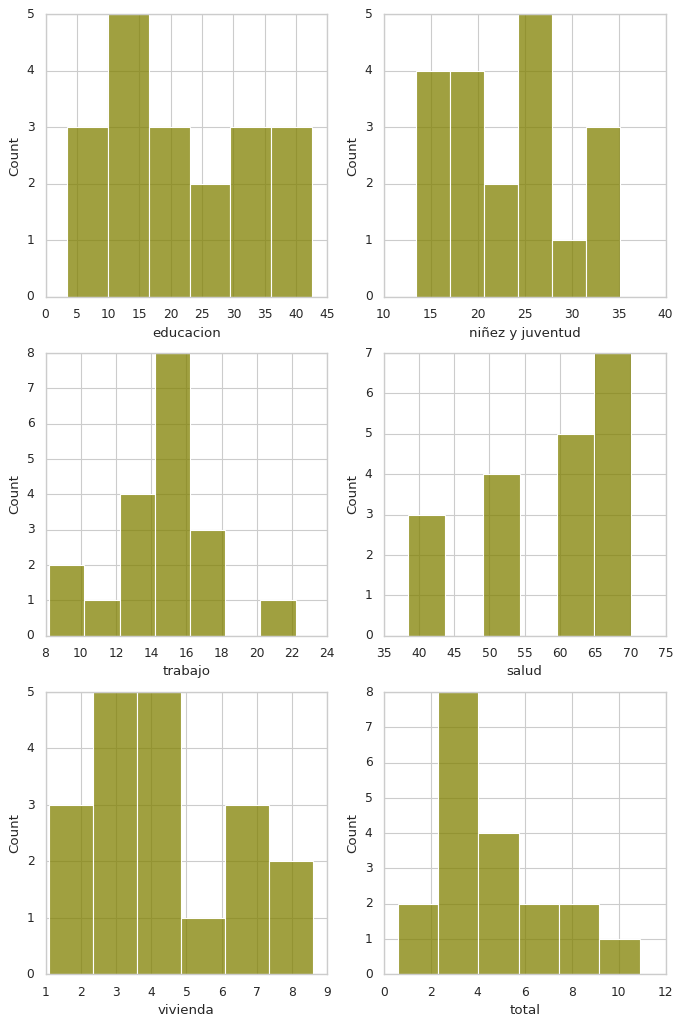

In [90]:
# Matplotlib y módulos asociados para graficar
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.style.use('classic')


import seaborn as sns
sns.set(style = 'whitegrid')

# Histogramas para la pobreza multidimensional por categoria
fig, axs= plt.subplots(3,2, figsize =(10,15))
sns.histplot(data = pobreza_multidimensional, x='educacion', color = "olive", ax=axs[0,0])
sns.histplot(data = pobreza_multidimensional, x='niñez y juventud', color = "olive", ax = axs[0,1])
sns.histplot(data = pobreza_multidimensional, x='trabajo', color = "olive", ax = axs[1,0])
sns.histplot(data = pobreza_multidimensional, x='salud', color = "olive", ax = axs[1,1])
sns.histplot(data = pobreza_multidimensional, x='vivienda', color = "olive", ax = axs[2,0])
sns.histplot(data = pobreza_multidimensional, x='total', color = "olive", ax = axs[2,1])

### Tabla 1: Estadísticas Descriptivas de la proporción de pobreza multidimensional en las localidades de Bogotá ###
---

In [91]:
pobreza_multidimensional.describe().iloc[1:,:-1]

,educacion,niñez y juventud,trabajo,salud,vivienda
mean,21.668421,23.310526,14.600000,58.442105,4.347368
std,11.506522,6.434447,3.232474,9.906357,2.113020
min,3.400000,13.400000,8.200000,38.500000,1.100000
25%,14.550000,19.200000,13.200000,50.700000,2.850000
50%,17.200000,23.700000,14.800000,61.700000,3.800000
75%,31.200000,27.300000,16.000000,65.750000,6.050000
max,42.600000,35.100000,22.200000,70.100000,8.600000


A nivel global podemos observar en los datos de pobreza multidimensional algunas cosas:

 - En promedio el 58.44% de los habitantes de bogotá se consideran pobres en la dimensión de salud, siendo la dimensión con mayor volumen de individuos clasificados como pobres, donde la localidad con la menor proporción de personas pobres en esta dimensión es del 38.5% y la categoria que en promedio tiene menor porcentaje de personas consideradas pobres es la dimensión de vivienda.

-  La educación es la variable que presenta mayor dispersión, donde en promedio el número de personas clasificadas como pobres se alejan en 11% respecto a su media para las distintas localidades de Bogotá.

- Para la dimensión de salud, las localidades con el 25% menor de personas consideradas pobres, la proporción de personas por localidad es menor o igual a 50.70%, mientras que las localidades con el 25% mayor de personas consideradas pobres tienen una proporción mayor o igual a 65.75% de personas por localidad. La localidad con la mayor proporción de personas pobres en la dimensión de salud tiene una proporción del 70.10% de personas.


### Gráfico 2: Distribución de la proporción de habitantes por localidad según estrato socioeconómico ###
---

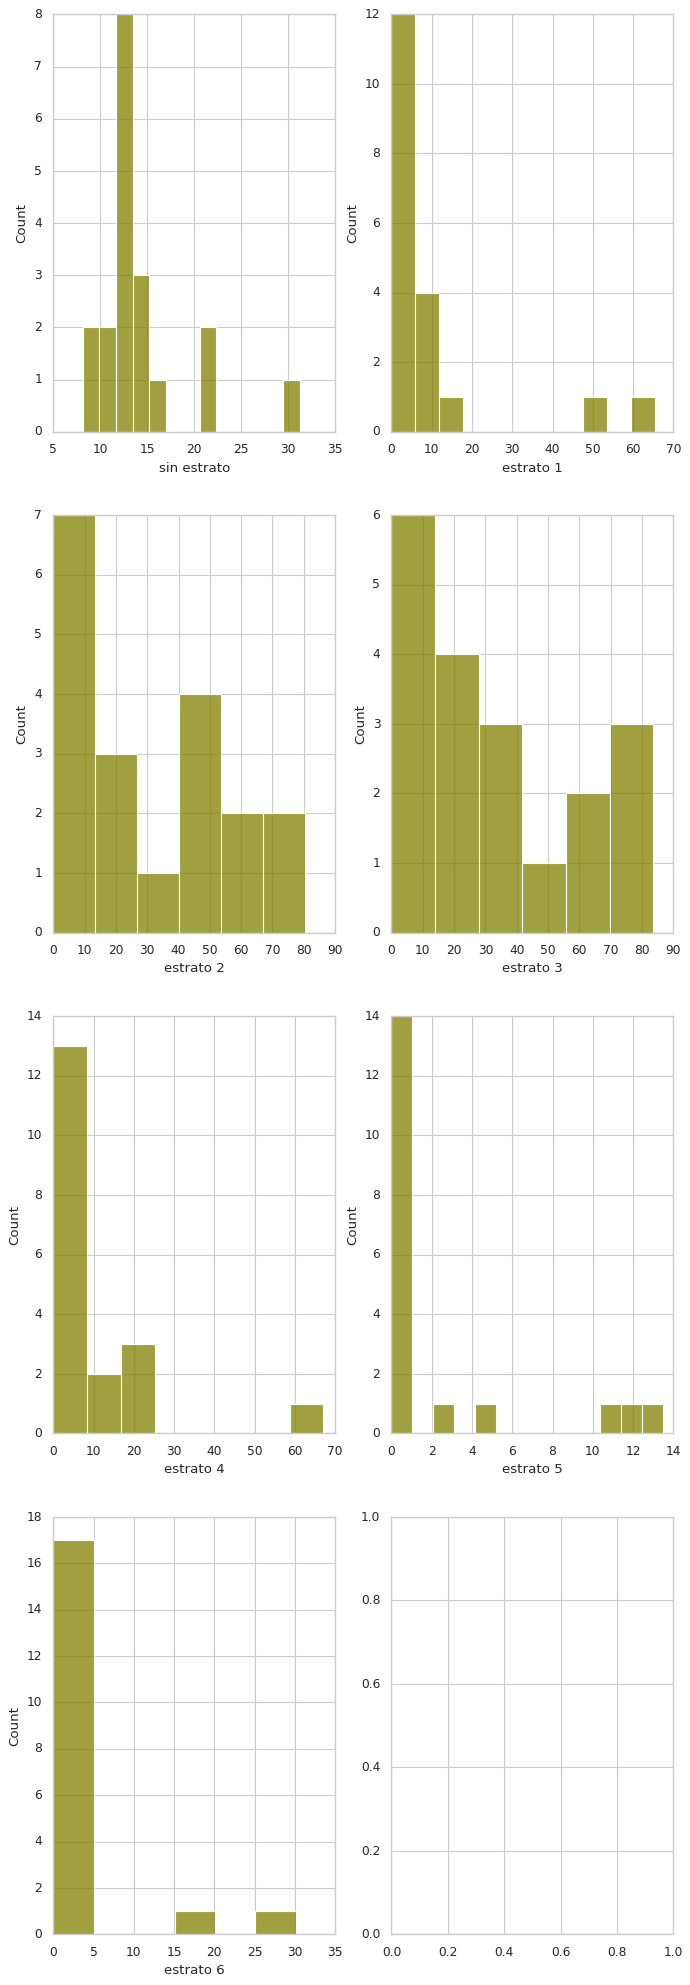

In [92]:
# Proporción de habitantes en las localidades por estrato
fig, axs= plt.subplots(4,2, figsize =(10,30))
sns.histplot(data = datos_estrato, x='sin estrato', color = "olive", ax=axs[0,0])
sns.histplot(data = datos_estrato, x='estrato 1', color = "olive", ax = axs[0,1])
sns.histplot(data = datos_estrato, x='estrato 2', color = "olive", ax = axs[1,0])
sns.histplot(data = datos_estrato, x='estrato 3', color = "olive", ax = axs[1,1])
sns.histplot(data = datos_estrato, x='estrato 4', color = "olive", ax = axs[2,0])
sns.histplot(data = datos_estrato, x='estrato 5', color = "olive", ax = axs[2,1])
sns.histplot(data = datos_estrato, x='estrato 6', color = "olive", ax = axs[3,0])

In [93]:
# Asimetria y curtosis 
from scipy.stats import *
asimetria = []
curtosis = []

#
for valor in datos_estrato.columns.tolist()[1:]:
  asimetria.append(round(skew(datos_estrato[str(valor)].tolist(), bias = False), ndigits = 2))
  curtosis.append(round(kurtosis(datos_estrato[str(valor)].tolist(), bias = False), ndigits = 2))

In [94]:
descriptivas_estratos = datos_estrato.describe()
descriptivas_estratos.loc[8,:] = asimetria
descriptivas_estratos.loc[9,:] = curtosis

### Tabla 2: Estadísticas Descriptivas de la clasificación socioeconómica de la proporción de individuos por localidad ###
---

In [95]:
descriptivas_estratos.rename(index = {8:'asimetria', 9 :'kurtosis'}, inplace = True)
descriptivas_estratos

,sin estrato,estrato 1,estrato 2,estrato 3,estrato 4,estrato 5,estrato 6
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,14.268421,9.301579,30.536842,32.960000,8.311053,2.277895,2.654737
std,5.452354,18.097173,25.492170,27.505139,16.050611,4.438036,7.806001
min,8.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,0.060000,9.935000,11.265000,0.000000,0.000000,0.000000
50%,12.910000,1.310000,24.630000,23.960000,0.550000,0.000000,0.000000
75%,14.265000,8.595000,46.655000,50.925000,11.975000,1.470000,0.000000
max,31.250000,65.340000,80.460000,83.660000,67.060000,13.490000,30.120000
asimetria,2.030000,2.590000,0.470000,0.640000,3.020000,1.860000,3.120000
kurtosis,4.600000,6.040000,-0.940000,-0.810000,10.480000,2.040000,9.440000


Para el caso de los datos de estratos por localidades en bogotá, tenemos que la proporción de personas clasificadas sin estrato en promedio es del 14.26% para todas las localidades, donde la localidad con menor número de personas no clasificadas por estrato tiene una proporción de 8.11% de personas, el 25% de las proporciones más bajas son menores o iguales a 11.80% mientras que el 75% de las proporciones más altas en las localidades sin estrato es de 14.26%, a su vez la mayor proporción de personas clasificadas sin estrato en las distintas localidades se centran en valor de proporción por debajo de la media.

Para el estrato 1, tenemos que en promedio las distintas localidades tienen un 19% de personas clasificadas en este, donde la localidad con el menor porcentaje de personas de estrato 1 tiene 0 clasificados en este. Las localidades con el 25% de las proporciones de personas más bajo tienen valores menores o iguales a 0.06% mientras que el 25% de las localidades con las mayores proporciones de personas de estrato 1 tiene valores mayores o iguales a 8.59% de personas.
La cantidad de individuos de estrato 1 para las distintas localidades se centran en valores bajos de proporción de personas por localidad.

En el estrato 2 tenemos que en promedio las distintas localidades tienen 30.52% de habitantes de este estrato, donde las localidades con el 25% de las proporciones menores  de personas de estrato 2 tienen 9.93% de personas o menos. Mientras que las localidades con el 25% mayor de proporciones de personas de estrato 2 tienen un valor de 46.65% de personas o más. La mayor proporción de personas de estrato 2 para las distintas localidades se centran en valores bajos de personas por localidad.

Dado que los coeficientes de asimetría para los distintos estratos socioeconómicos de bogotá son positivos, podemos entender que para todos los estratos y la no clasificación de estrato socioeconómico se centran en valores bajos para las distintas localidades, esto sugiere que no hay grupos altamente diferenciados de población basados en estratos económicos en bogotá. 

La proporción de personas de estrato 3 en las localidades de bogotá en promedio son de 32.96% personas, donde la localidad con menor proporción de personas de estrato 3 tiene 0% de personas, y la localidad con mayor proporción de personas de estrato 3 tiene 86.66%.
Las localidades con el 25% menor de personas de estrato 3 tiene una proporción menor o igual a 11.26% mientras que las localidades con el 25% mayor de personas de estrato 3 tienen una proporción mayor o igual a 50.92%.

Las localidades en promedio tienen 8.31% de personas de estrato 4, donde aquellas con el 25% menor tienen una proporción menor o igual a 0 y las localidades con el 25% de mayor proporción de personas de estrato 4 tienen  un valor mayor o igual a 11.97%. Aquella localidad con mayor concentración de personas de este estrato socioeconómico tienen una proporción del 67.06%.

Las localidades tienen en promedio 2.27% de personas de estrato 5, donde hay una o varias localidades sin ningún habitante de estrato 5, por otra parte las localidades con el 25% menor de habitantes de estrato 5 tiene una proporción menor o igual a 0, mientras que las localidades con el 25% mayor de habitantes tiene una proporciór de habitantes por localidad mayor o igual a 1.75%. Aquella localidad con mayor concentración de personas de estrato 5 tiene una proporción de 13.9% de sus habitantes en este mismo.

Las localidades tienen en promedio 2.65% de personas de estrato 6, donde hay una o varias localidades que no tienen habitantes de este estrato socioeconómico. Las localidades con el 25% menor de personas de estrato 6 tienen una proporción de ciudadanos menor o igual a cero, mientras que las localidades con el 25% mayor de personas de estrato 6 tienen una proporción igual o mayor a cero. Aquella localidad con el mayor volumen de personas de estrato 5 tienen una proporción de 30.12%.

A nivel global podemos observar que las localidades de bogotá tienen dentro de su composición socioeconómica tienen una mayor proporción de personas de estrato 2 y 3, mientras el estrato soeciocómico 5 y 6 que son los más altos representan partes muy pequeñas de las localidades en terminos de su clasificación socioeconómica, esto implica entonces una alta presencia de estrato bajo y medio bajo para todas las localidades de bogotá.





In [96]:
# Construimos el dataset final
datos_final = pd.merge(datos_estrato, pobreza_multidimensional, how='inner', on = ['localidad'])
datos_final = pd.merge(datos_final, datos_localidades, how ='inner', on = ['localidad'])

In [97]:
datos_final

,localidad,sin estrato,estrato 1,estrato 2,estrato 3,estrato 4,estrato 5,estrato 6,educacion,niñez y juventud,trabajo,salud,vivienda,total,longitud,latitud
0,usaquen,12.92,5.33,12.79,22.87,14.80,13.49,17.81,9.2,18.8,13.3,43.5,2.1,2.6,-74.0312,4.7485
1,chapinero,12.92,9.09,12.57,5.17,18.54,11.59,30.12,5.7,13.4,8.5,42.3,3.8,2.2,-74.0467,4.6569
2,santa fe,12.91,8.10,55.44,18.73,4.81,0.00,0.00,29.8,19.7,15.3,65.7,6.4,7.8,-74.0298,4.5963
3,san cristobal,12.30,7.23,71.29,9.18,0.00,0.00,0.00,36.1,29.3,15.8,66.2,7.7,6.8,-74.0883,4.5463
4,usme,16.36,52.11,31.52,0.00,0.00,0.00,0.00,42.6,35.1,17.4,70.1,7.2,10.9,-74.1033,4.4766
5,tunjuelito,9.09,0.35,63.75,32.70,0.00,0.00,0.00,27.1,25.1,16.1,65.1,5.8,4.8,-74.1407,4.5875
6,bosa,8.11,9.87,80.46,1.56,0.00,0.00,0.00,33.7,32.3,18.1,63.7,4.7,6.6,-74.1945,4.6305
7,kennedy,11.23,1.31,48.95,37.76,0.76,0.00,0.00,23.2,27.2,15.3,60.0,3.6,5.3,-74.1573,4.6268
8,fontibon,21.76,0.12,15.79,44.35,17.15,0.83,0.00,14.3,22.9,13.0,49.5,2.8,3.2,-74.1479,4.6832
9,engativa,13.81,0.82,24.63,57.50,3.24,0.00,0.00,15.3,23.7,15.9,51.5,2.9,2.7,-74.1072,4.7071


### Gráfico 3: Mapa de Bogotá con sus distintas localidades ###
---

In [98]:
# Crear mapa de Bogotá
map_bogota = folium.Map(location = [4.60971,-74.08175], zoom_start = 11)

# Añadir localidades al mapa
for lat,lng, label in zip(datos_final['latitud'], datos_final['longitud'], datos_final['localidad']):
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat,lng],
      radius = 5,
      popup = label,
      color = 'red',
      fill = True,
      fill_color='#3186cc',
      fill_opacity = 0.7,
      parse_html = False).add_to(map_bogota)
map_bogota

In [99]:
# Vamos a segmentar las localidades y explorar los hospitales dentro de estas
CLIENT_ID = 'XZVAQZY5M1ZDTZ0VP4QMFIOSKI2N3FN4IZKFLMKQT3HBNHFZ' 
CLIENT_SECRET = '4D1GS5UG44BPQKPDL2MIHKZD54GNWV3HFVKJWZAIX0G2AIIM' 
VERSION = '20160514' 
LIMIT = 50

In [100]:
# Generamos las url para cada una de las llamadas a la API de Foursquare
urls = []
radius = 2000
categories = '15000'
excluir = '15054'  #Excluimos los servicios de salud veterinaria
for latitud, longitud in zip(datos_final['latitud'], datos_final['longitud']):
 url = 'https://api.foursquare.com/v3/places/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categories={}&exclude_chains={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitud, 
    longitud, 
    radius, 
    LIMIT,
    categories,
    excluir)
 urls.append(url)

In [101]:
urls[0]

'https://api.foursquare.com/v3/places/search?client_id=XZVAQZY5M1ZDTZ0VP4QMFIOSKI2N3FN4IZKFLMKQT3HBNHFZ&client_secret=4D1GS5UG44BPQKPDL2MIHKZD54GNWV3HFVKJWZAIX0G2AIIM&v=20160514&ll=4.7485,-74.0312&radius=2000&limit=50&categories=15000&exclude_chains=15054'

In [102]:
# Usamos la autorización para hacer llamadas a la API de Foursquare en la version 3
# Generamos cada uno de los json a partir de las urls, los convertimos en diccionarios 
# y extraemos el nombre, latitud, longitud y categoria de lugares de categoria de servicios de salud
# a un radio de 2 kilometros para cada localidad.
import json
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3NMWGfjOVVhGqVteo4IZTw7TrzwJVJG8s0Fb0KFm3rlY="}

nombre = []
lat = []
lng = []
categoria = []
localidad = []

#
for url in urls: 
  response = requests.request("GET", url, headers=headers)
  dicc = json.loads(response.text)['results']
  for valor in range(0,len(dicc)):
    categoria.insert(valor, dicc[valor]['categories'][0]['name'])
    nombre.insert(valor, dicc[valor]['name'])
    lat.insert(valor, dicc[valor]['geocodes']['main']['latitude'])
    lng.insert(valor, dicc[valor]['geocodes']['main']['longitude'])

In [103]:
servicios_salud = {'nombre':nombre, 'latitud':lat, 'longitud':lng, 'categoria':categoria}

In [104]:
servicios_salud = pd.DataFrame(servicios_salud)
servicios_salud.head(10)

,nombre,latitud,longitud,categoria
0,Penas Cubides Rosanna,4.508018,-74.143264,Physical Therapy Clinic
1,Fundación HOMI-Hospital de la Misericordia,4.594399,-74.088635,Medical Center
2,residencias R10,4.599910,-74.070490,Assisted Living Service
3,Clínica Odontológica Sonrisas Brillantes,4.601541,-74.076424,Dentist
4,Óptica Monserrate,4.603135,-74.075126,Ophthalmologist
5,Hospital Universitario Samaritana,4.587172,-74.083825,Hospital
6,Instituto Nacional de Cancerologia E.S.E,4.588097,-74.084438,Hospital
7,Fundación Hospital De La Misericordia-Bogotá,4.591883,-74.088619,Hospital
8,Centro Óptico Tequendama E U,4.608007,-74.075796,Ophthalmologist
9,Hospital San Juan De Dios,4.590040,-74.088724,Hospital


In [105]:
servicios_salud.shape

(608, 4)

In [106]:
from geopy.distance import geodesic 

# 
localidades = []

for lat,lng, localidad in zip(datos_final['latitud'],datos_final['longitud'],datos_final['localidad']):
 localidades.append([lat,lng,localidad])

servicios_explorados = []

for lat,lng in zip(servicios_salud['latitud'], servicios_salud['longitud']):
  servicios_explorados.append([lat,lng])

In [107]:
localidades = np.array(localidades)
servicios_explorados = np.array(servicios_explorados)

In [108]:
# Calculamos las distancias geodésicas de los lugares y las distintas localidades
distancias = np.zeros((608,17))
fila = [x for x in range(0,608)]
columna = [x for x in range(0,17)]

for lat_localidad, lng_localidad, col in zip(localidades[:,0], localidades[:,1], columna):
  coordenadas_localidad = (float(lat_localidad), float(lng_localidad))
  for lat_lugares, lng_lugares, row in zip(servicios_explorados[:,0], servicios_explorados[:,1], fila):
    coordenadas_lugares = (lat_lugares, lng_localidad)
    distancias[row][col] = geodesic(coordenadas_localidad, coordenadas_lugares).kilometers

# Encontramos la distancia más cercana para cada lugar con su respectiva localidad
min_distancia = np.zeros((608,2)).astype(str)
localidades = localidades[:,2].tolist()

for row in fila:
  min_distancia[row][0] = distancias[row].argmin()
  min_distancia[row][1] = localidades[int(min_distancia[row][0])]

In [109]:
# Asignamos la localidad a su respectivo lugar explorado
servicios_salud['localidad'] = min_distancia[:,1].tolist()

In [110]:
servicios_salud.head(10)

,nombre,latitud,longitud,categoria,localidad
0,Penas Cubides Rosanna,4.508018,-74.143264,Physical Therapy Clinic,ciudad bolivar
1,Fundación HOMI-Hospital de la Misericordia,4.594399,-74.088635,Medical Center,la candelaria
2,residencias R10,4.599910,-74.070490,Assisted Living Service,los martires
3,Clínica Odontológica Sonrisas Brillantes,4.601541,-74.076424,Dentist,los martires
4,Óptica Monserrate,4.603135,-74.075126,Ophthalmologist,los martires
5,Hospital Universitario Samaritana,4.587172,-74.083825,Hospital,tunjuelito
6,Instituto Nacional de Cancerologia E.S.E,4.588097,-74.084438,Hospital,tunjuelito
7,Fundación Hospital De La Misericordia-Bogotá,4.591883,-74.088619,Hospital,la candelaria
8,Centro Óptico Tequendama E U,4.608007,-74.075796,Ophthalmologist,los martires
9,Hospital San Juan De Dios,4.590040,-74.088724,Hospital,tunjuelito


In [111]:
# Eliminamos todos los lugares con categoria de veterinario
servicios_salud = servicios_salud[servicios_salud['categoria']!= 'Veterinarian']
servicios_salud.shape

(559, 5)

### Resultados: ###


### Gráfico 4: Participación (%) de las categorias de servicios de salud en la localidad de Ciudad Bolivar ###
---

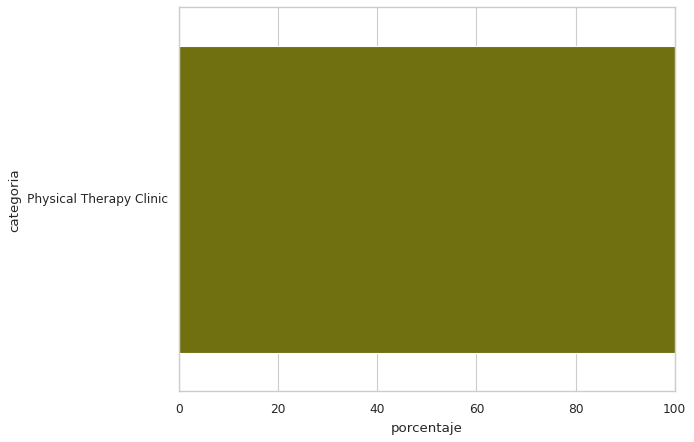

In [112]:
localidades = servicios_salud['localidad'].unique()

# Generamos las tablas con las proporciones de cada categoria por localidad
def tablas_porcentajes(localidad):
  df =pd.DataFrame(servicios_salud[servicios_salud['localidad']== localidad].groupby('categoria')['nombre'].count()).reset_index().sort_values(['nombre'], ascending = False)
  df['porcentaje'] = 100 * df['nombre'] / df['nombre'].sum()
  return df

datos_tablas = list(map(tablas_porcentajes, localidades))

#
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[0], color = 'olive')

A partir de la **Gráfica 4** podemos ver que la totalidad de servicios de salud ubicados en la localidad de Ciudad Bolivar son servicios de terapia física. Es interesante, principalmente a las implicaciones de que los habitantes de esta localidad requeriran transportarse a otras localidades con el fin de acceder a servicios de salud distintos a este, por lo que se requiran mayores costos de transacción para el acceso de servicios de salud.

### Gráfico 5: Participación (%) de las categorias de servicio de salud en la localidad de Santa Fe ###
---

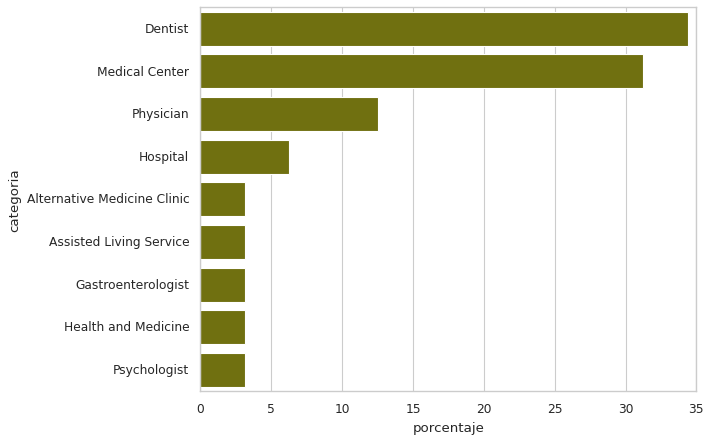

In [113]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[1], color = 'olive')

De acuerdo al **Gráfico 5** podemos observar que para la localidad de Santa Fe, el 40% de los servicios de salud son de tipo odontológicos, el 10% de los servicios son de tipo hospitalario y de médicos de atención primaria con un 10% para cada una de estas categorías, por otra parte el 20% de lo servicios de salud en esta localidad son de la categoria salud y medicina.

### Gráfico 6: Participación (%) de las categorias de servicio de salud en la localidad de la Candelaria ###
---

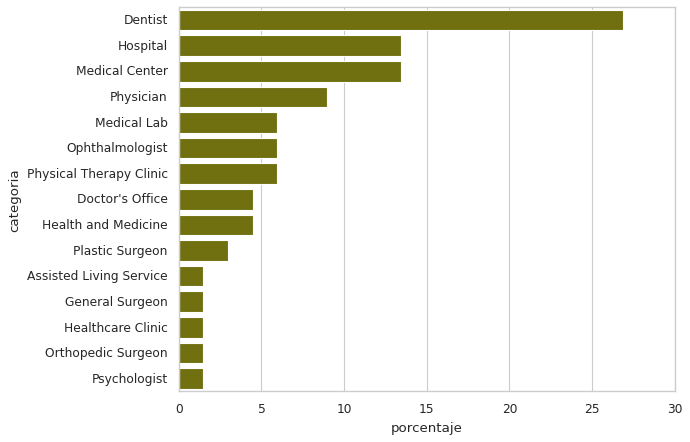

In [114]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[2], color = 'olive')

Para el **Gráfico 6** podemos ver que los servicios con mayor densidad en la localidad de la Candelaria, son los servicios odontologicos con una proporción del 35% del total de servicios de salud, seguido de centros médicos y hospitales con una participación del 24.32% y 16.21% respectivamente.

Los servicios de salud menos presentes en la localidad son los de psicología, gastroenterología, servicios de soporte vital y medicina alternativa con una participación de 2.70% para cada uno de estos.

### Gráfico 7: Participación (%) de las categorias de servicio de salud en la localidad de los Mártires ###
---

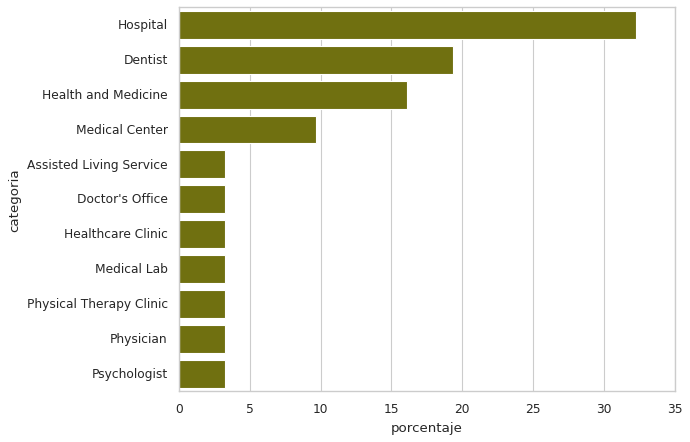

In [115]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[3], color = 'olive')

En el **Gráfico 7** las categorias de servicios de salud que mayor participación tienen en la localidad de los Mártires son, odontología y centros médicos con una participación del 24.07% del total de servicios de salud de la localidad, seguidos de servicios de hospitalización con una participación del 22.22%.

Por otra parte los servicios de salud que menor densidad o existencia hay en la localidad son los de terapia física, oftalmología, cirugía general, servicios de soporte vital y medicina alternativa con una participación del 1.85%.

### Gráfico 8: Participación (%) de las categorias de servicio de salud en la localidad de Tunjuelito ###
---

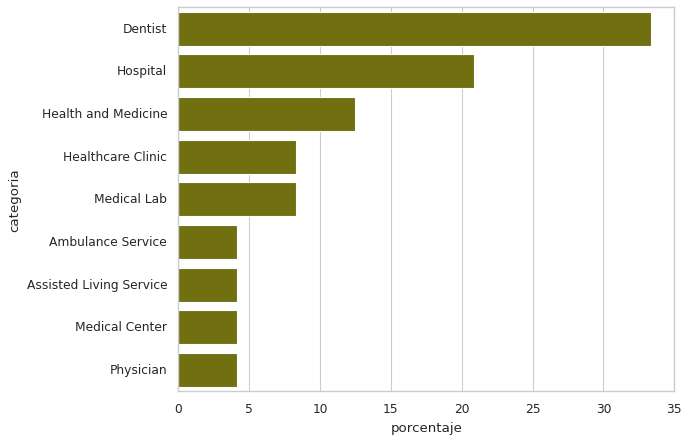

In [116]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[4], color = 'olive')

Podemos observar en el **Gráfico 8** que los principales servicios de salud que existen en tunjuelito son asociados a servicios hospitalarios con una participación del 43.33%, seguido de servicios de odontología y centros médicos de atención primaria con una participación del 13.33% para cada uno de estos.

Los servicios de salud que menor volumen hay en esta localidad son terapia física, especialidades como oftalmología, laboratorio médico y servicios de soporte vital con una participación del 3.33% para cada uno de ellos.

### Gráfico 9: Participación (%) de las categorias de servicio de salud en la localidad de Puente Aranda ###
---

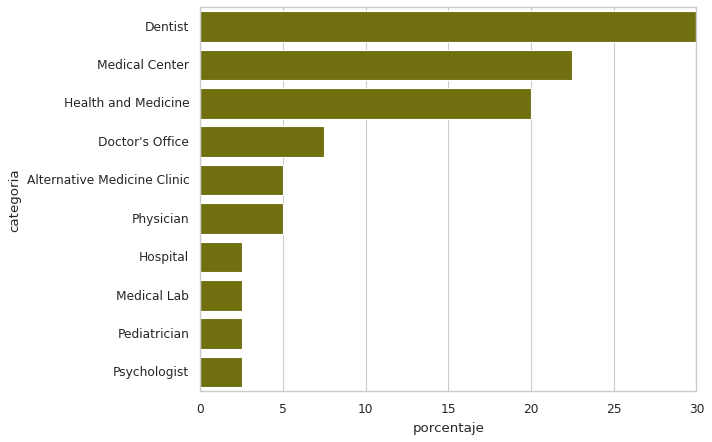

In [117]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[5], color = 'olive')

Para el caso del **Gráfico 9** tenemos que para la localidad de Puente Aranda, el servicio de salud con mayor participación en la localidad son los servicios de odontología, con una participación del 19.047%, seguido de los centros médicos con una participación del 16.66%, los servicios de salud y medicina generales con una participación del 14.28%.

Las categorias de servicios de salud menos frecuentes en esta localidad son los servicios asociados a especialidades, como podologia con una participación del 2.38%, oftalmología con 2.38% y servicios de ambulancia y laboratorio clínico con una participación del 4.76% para cada uno de ellos.

### Gráfico 10: Participación (%) de las categorias de servicio de salud en la localidad de Kennedy ##
---

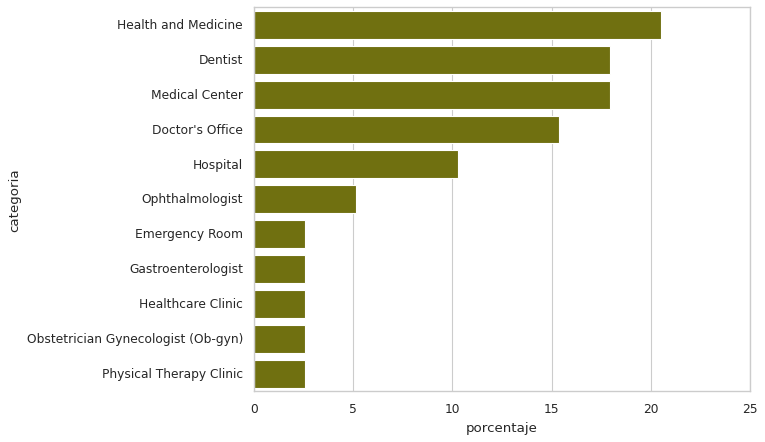

In [118]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[6], color = 'olive')

En la localidad e Kennedy, podemos observar en el **Gráfico 10**, que los servicios de salud que mayor participación tienen en la localidad son odontología, salud y medicina general y centros médicos con una participación en los servicios de salud de 18.42%, 18.42% y 15.78% respectivamente.

Por otra parte los servicios de salud que menor volumen hay en la localidad son servicios de especialidades, como terapia física, obstetricia y ginecología, y clínicas de cuidado de la salud con una participación del 2.63% para cada uno de ellos.

### Gráfico 11: Participación (%) de las categorias de servicio de salud en la localidad de Bosa ##
---

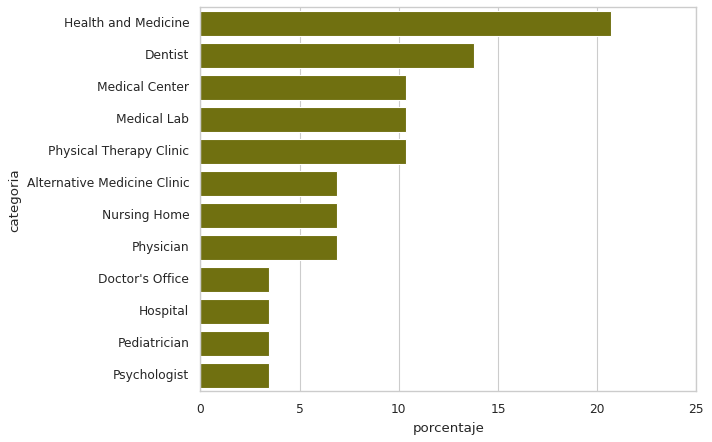

In [119]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[7], color = 'olive')

En la localidad de Bosa, podemos ver en el **Gráfico 11**, que las categorias de servicios de salud que mayor frecuencia tienen son, los servicios de odontología y salud y medicina con una participación del 19.35% del total de servicios de salud en la localidad para cada uno de estos. Seguido de centros médicos y doctores de atención primaria con una participación del 12.90% para cada uno.

Las categorias de servicios de salud menos frecuentes en la localidad, son laboratorios clínicos, servicios de psicología y asílos de ancianos con una participación del 3.22% en la totalidad de servicios de salud en la localidad.

### Gráfico 12: Participación (%) de las categorias de servicio de salud en la localidad de Teusaquillo ###
---

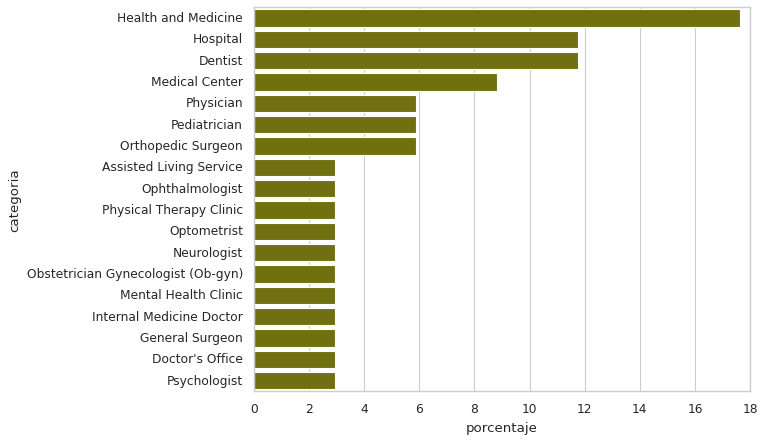

In [120]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[8], color = 'olive')

En la localidad de Teusquillo según el **Gráfico 12** la oferta de servicios de salud se compone principalmente de la categoria de salud y medicina con una participación del 16.66%, seguido de servicios de especialidades como obstetricia y ginecología con una participación del 13.33%.

Se puede notar que en esta localidad existe variedad de servicios especializados como cirugía general, cirugía ortopédica y en menor medida servicios de vida asistida, medicina interna, neurología, nutrución, optometría y psicología, siendo estos últimos los de menor volumen de oferta de servicios de salud en la localidad con una participación del 3.33% respectivamente para cada uno.

### Gráfico 13: Participación (%) de las categorias de servicio de salud en la localidad de Chapinero ###
---

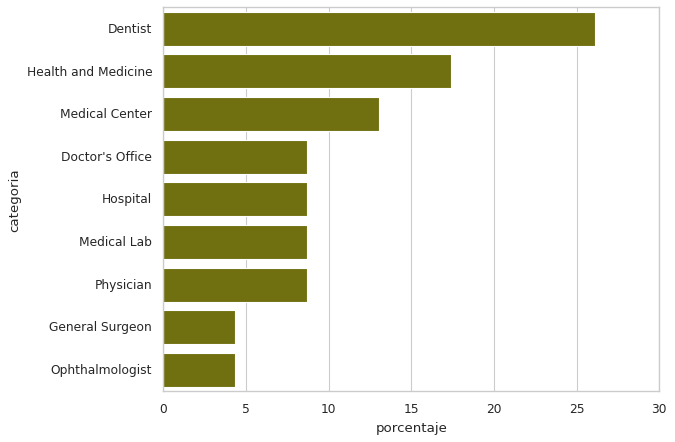

In [121]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[9], color = 'olive')

Para la localidad de Chapinero, podemos observar en el **Gráfico 13**, que los servicios de salud que mayor oferta tienen, son los de odontología, centros médicos y laboratorios clínicos con una participación del 28.57%, 14.28% y 14.28% respectivamente.

La oferta de servicios de salud especializados es pequeña, siendo el caso de los servicios de oftalmología los que menor oferta tienen con una participación del 3.57%, al igual que los servicios de ambulancia.

### Gráfico 14: Participación (%) de las categorias de servicio de salud en la localidad de Barrios Unidos ###
---

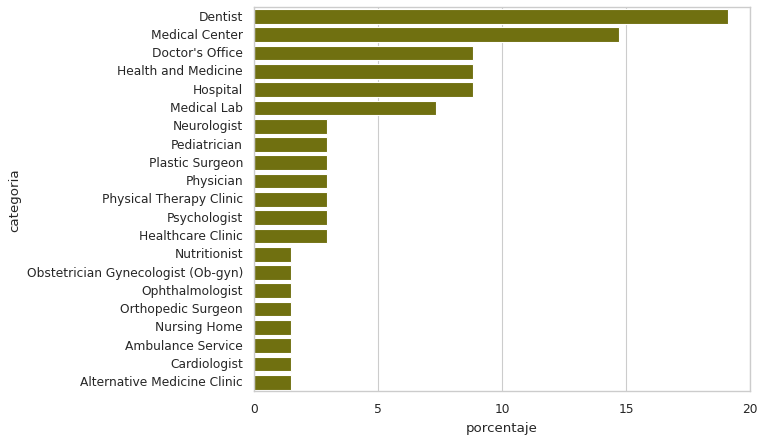

In [122]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[10], color = 'olive')

Para la localidad de Barrios Unidos, podemos ver en el **Gráfico 14** que los servicios de salud que mayor oferta tienen son centros médicos con una participación del 17.91%, odontología con una participación del 14.92% seguido de medicina general con una participación del 13.43%.

También, se puede notar que existe alta variedad de servicios de especialistas como psicología, neurología, nutrición, obstetricia y gincecología, psiquiatría donde estos son los que menor oferta tienen en la localidad con una participación del 1.49% seguidos de especialidades como pediatría, cirugía general con una participación del 2.98%. Finalmente los servicios de especialidades médicas que mayor oferta tiene la localidad son los de oftalmología y cirugía ortopédica con una participación del 4.47% en el total de servicios de salud de la localidad.

### Gráfico 15: Participación (%) de las categorias de servicio de salud en la localidad de Fontibón ###
---

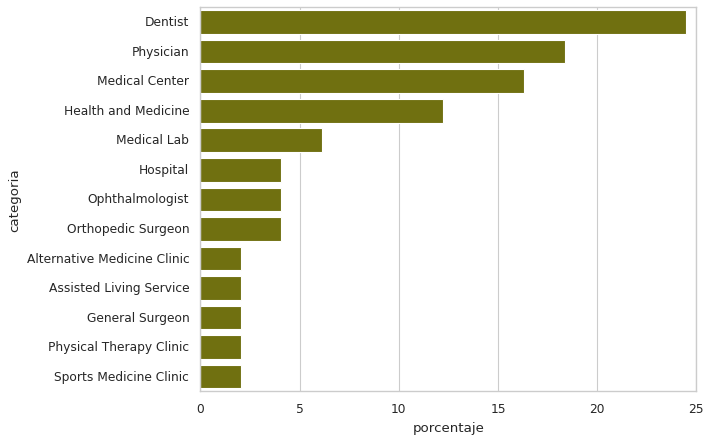

In [123]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[11], color = 'olive')

En la localidad de Fontibón, podemos ver en el **Gráfico 15** que los principales servicios de salud que se prestan en la localidad son los de odontología, medicina general y salud y medicina con una participación del 27.69%, 17.02%, y 14.89% respectivamente. Tambien podemos ver la presencia de servicios de especialidades como medicina del deporte, y cirugía ortopédica con con una participación del 2.12% del total de servicios de salud en la localidad, seguido de servicios de oftalmología y terapia física con una participación del 4.25% respectivamente para cada uno. 

### Gráfico 16: Participación (%) de las categorias de servicio de salud en la localidad de Usaquén ###
---

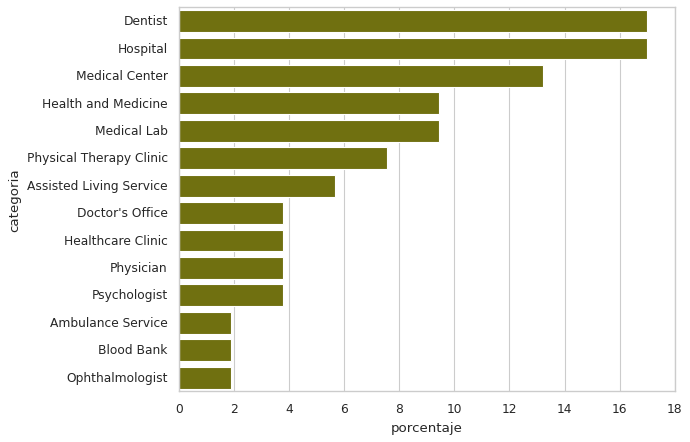

In [124]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[12], color = 'olive')

En la localidad de Usaquén la oferta de servicios de salud según el **Gráfico 16**, se centra principalmente en servicios de Hospitalización, odontología y centros médicos ambulatorios con una participación del 21.18%, 14.54% y 12.72%. A diferencia de otras localidades en esta, existe una mayor oferta de servicios de terapia física y laboratorios clínicos con una participación del 5.45% y 10.90% respectivamente.

Los servicios de salud que menor oferta tiene la localidad son los de oftalmología, bancos de sangre y servicios de ambulancia con una participación del 1.81% respectivamente para cada uno de estos.

### Gráfico 17: Participación (%) de las categorias de servicio de salud en la localidad de Suba ###
---

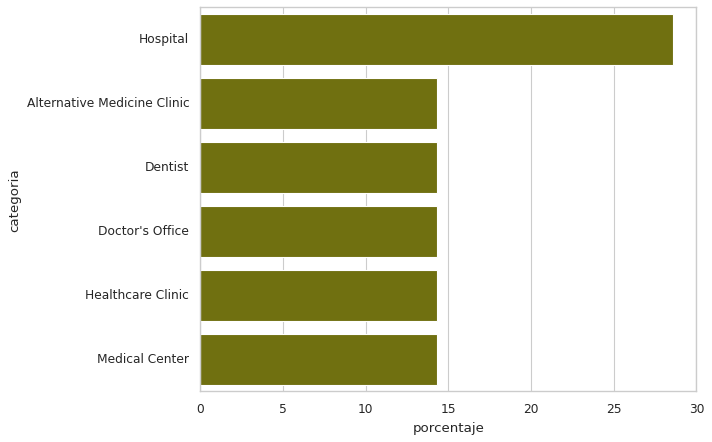

In [125]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[13], color = 'olive')

En la localidad de Suba, en base al **Gráfico 17** podemos observar que los servicios de salud en la localidad principalmente se centran en servicios de hospitales con una participación del 40%, seguido de los servicios de clínicas de medicina alternativa, clinica de cuidad de la salud y centros médicos de atención primaria con una participación en los servicios de salud en la localidad del 20% respectivamente para cada uno de ellos.

Algo interesante es que en la localidad hay una baja o nula presencia de especialistas médicos, lo cuál implica que para individuos con alta sensibilidad al precio, es decir a los individuos con bajos ingresos económicos los costos de transacción para acceder a servicios especializados serán mayores principalmente por las mayores distancias que se deberán recorrer. Sin embargo es importante entender que lugares como hospitales de urgencias o centros de atención primaria suelen contar con una variedad de especialistas, pero que en base a las categorias que arroja la API de foursquare, no hay centros especializados de forma específica, por ejemplo centros de cirugía ortopédica u/o centros de enfermedades del sistema nervioso.

### Gráfico 18: Participación (%) de las categorias de servicio de salud en la localidad de Engativá ###
---

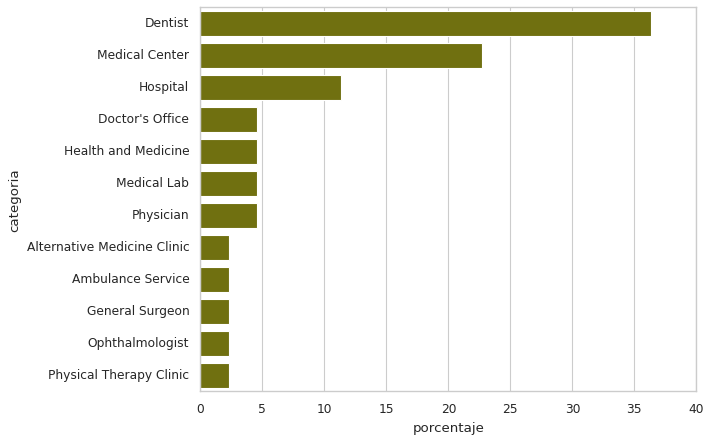

In [126]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[14], color = 'olive')

En la localidad de Engativá, según el **Gráfico 18** podemos observar que la oferta de servicios de salud, se centran en servicios de odontología, centros de atención primaria y servicios de medicina general con una participación del 30.76%, 20.51% y 15.38% respectivamente.

Por otra parte los servicios de salud con menor oferta en la localidad son clínicas de terapia física, cirugía ortopédica, obstetricia y ginecología, laboratorios clínicos y servicios de ambulancia con una participación del 2.56% en el total de servicios de salud en la localidad.

### Gráfico 19: Participación (%) de las categorias de servicio de salud en la localidad de San Cristobal ###
---

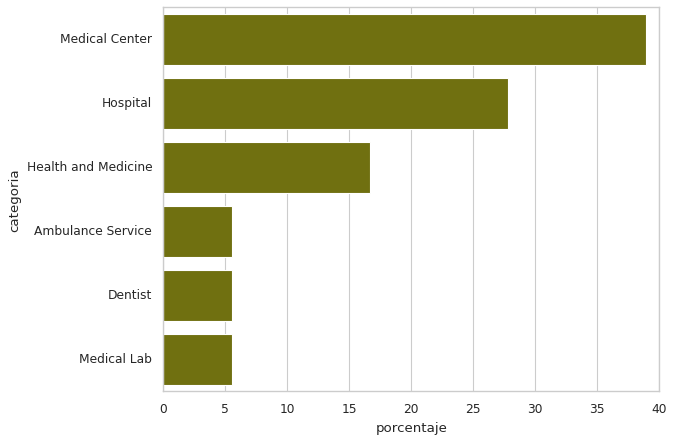

In [127]:
sns.barplot(x = 'porcentaje', y = 'categoria',data = datos_tablas[15], color = 'olive')

Para la localidad de San Cristobal podemos ver en el **Gráfico 19** que los servicios de salud se centran principalmente en las categorias de centros médicos de atención primaria y hospitales con una participación del 38.88% y 27.77% respectivamente.

Los servicios de salud que menor oferta tiene la localidad son los de laboratorios clínicos, odontología y servicios de ambulancia con una participación del 5.55% para cada uno de ellos respectivamente. 

En esta localidad existe una baja oferta de servicios de especialidades médicas, respecto a otras como Engativá, Usaquén o Teusaquillo.

Otro elemento interesante de análisis sería ver la oferta de servicios de salud a nivel global en Bogotá, de esta manera podríamos determinar que servicios son de dificil acceso debido a su oferta, lo que implica en general largas esperas de acceso a estas especialidades, lo que llegaría a afectar el control  o tratamiento de enfermedades crónicas y agudas que pueden afectar la salud y calidad de vida significativamente y en algunos casos con complicaciones irreversibles.

### Gráfico 20: Servicios de salud por categoria en Bogotá ###
---

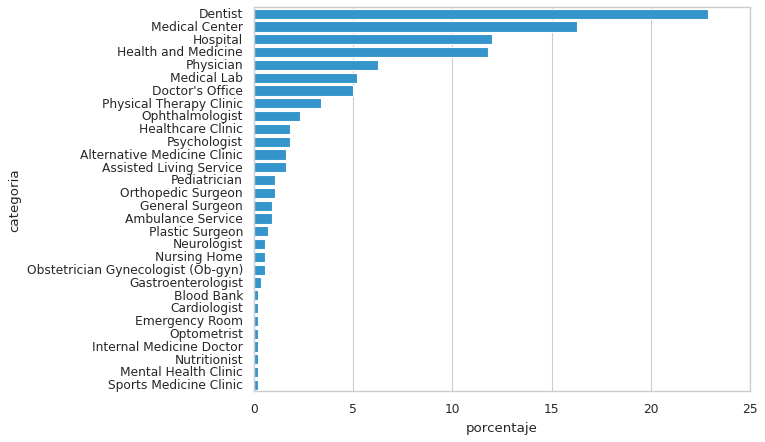

In [128]:
# Agrupamos por categoria y calculamos los porcentajes de participación
datos_agregados = pd.DataFrame(servicios_salud.groupby(['categoria']).count()).reset_index().loc[:,['categoria','nombre']]
datos_agregados["porcentaje"] = round(100 * datos_agregados['nombre'] / datos_agregados['nombre'].sum(),2)
datos_agregados = datos_agregados.sort_values(by = ['porcentaje'], ascending = False).reset_index(drop=True)

# Graficamos
ax = sns.barplot(x = 'porcentaje', y='categoria', data = datos_agregados, color = '#1B9BE5')

### Tabla 3: Participación (%) de las categorias de servicios de salud en Bogotá ###
---

In [129]:
datos_agregados.drop(['nombre'], axis = 1)

,categoria,porcentaje
0,Dentist,22.90
1,Medical Center,16.28
2,Hospital,11.99
3,Health and Medicine,11.81
4,Physician,6.26
5,Medical Lab,5.19
6,Doctor's Office,5.01
7,Physical Therapy Clinic,3.40
8,Ophthalmologist,2.33
9,Healthcare Clinic,1.79


En el **Gráfico 20** y la **Tabla 5** podemos ver que los principales servicios de salud por categoria que se prestan en Bogotá son, odontología, centros médicos, hospitalización, servicios de salud y medicina y medicina general, con una participación del 21.38%, 16.12%, 13.59%, 11.78% y 7.79% respectivamente.

Los servicios de salud especializados que mayor oferta tienen en la ciudad son los de laboratorio clínico, terapia física con una participación del 4.35% y 3.99%. Por otra parte las especialidades que menor oferta de servicios tienen son medicina deportiva, medicina interna, psiquiatría, podología, gastroentorología, bancos de sangre y optometría con una participación del 0.18% en el total de servicios de salud.

Esto implica un elevado costo de transacción en estos servicios de medicina especializada dada su escaza oferta y la probabilidad de transportarse largas distancias y conllevar esperas de atención largas para acceder a estos, lo que puede llegar a generar una desigualdad en el acceso a servicios de salud especializada, dada la escaza oferta además de los requerimientos tanto de servicios de salud pública como servicios de salud privada que podrían incentivar la concentración de especialistas en algún régimen.

In [130]:
# Agrupamos los lugares explorados por localidad
total_salud = pd.DataFrame(servicios_salud.groupby(['localidad']).count()).reset_index().loc[:,['localidad','categoria']]

#Unimos esto a la base de datos final que contiene nuestras variables económicas y de pobreza multidimensional
datos_final = datos_final.merge(total_salud, on=['localidad'])

# Renombramos la vartiable categoria
datos_final = datos_final.rename(columns = {'categoria':'total servicios salud'})

In [131]:
datos_final.head()

,localidad,sin estrato,estrato 1,estrato 2,estrato 3,estrato 4,estrato 5,estrato 6,educacion,niñez y juventud,trabajo,salud,vivienda,total,longitud,latitud,total servicios salud
0,usaquen,12.92,5.33,12.79,22.87,14.80,13.49,17.81,9.2,18.8,13.3,43.5,2.1,2.6,-74.0312,4.7485,53
1,chapinero,12.92,9.09,12.57,5.17,18.54,11.59,30.12,5.7,13.4,8.5,42.3,3.8,2.2,-74.0467,4.6569,23
2,santa fe,12.91,8.10,55.44,18.73,4.81,0.00,0.00,29.8,19.7,15.3,65.7,6.4,7.8,-74.0298,4.5963,24
3,san cristobal,12.30,7.23,71.29,9.18,0.00,0.00,0.00,36.1,29.3,15.8,66.2,7.7,6.8,-74.0883,4.5463,18
4,tunjuelito,9.09,0.35,63.75,32.70,0.00,0.00,0.00,27.1,25.1,16.1,65.1,5.8,4.8,-74.1407,4.5875,31


In [132]:
# Eliminamos variables que no tienen información relevante para el set de agrupamiento
datos_final = datos_final.drop(['localidad','latitud','longitud'], axis = 1)
datos_final.head()

,sin estrato,estrato 1,estrato 2,estrato 3,estrato 4,estrato 5,estrato 6,educacion,niñez y juventud,trabajo,salud,vivienda,total,total servicios salud
0,12.92,5.33,12.79,22.87,14.80,13.49,17.81,9.2,18.8,13.3,43.5,2.1,2.6,53
1,12.92,9.09,12.57,5.17,18.54,11.59,30.12,5.7,13.4,8.5,42.3,3.8,2.2,23
2,12.91,8.10,55.44,18.73,4.81,0.00,0.00,29.8,19.7,15.3,65.7,6.4,7.8,24
3,12.30,7.23,71.29,9.18,0.00,0.00,0.00,36.1,29.3,15.8,66.2,7.7,6.8,18
4,9.09,0.35,63.75,32.70,0.00,0.00,0.00,27.1,25.1,16.1,65.1,5.8,4.8,31


### Tabla 4: Suma de cuadrados del error por cantidad de grupos ###
---

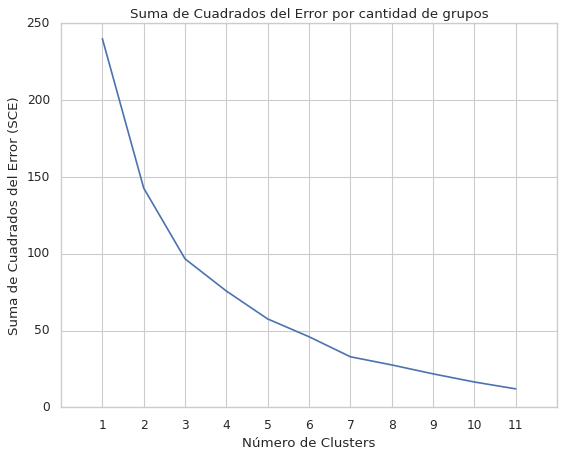

In [149]:
# Normalización
from sklearn.preprocessing import StandardScaler 
X = datos_final.values[:,:]
X = np.nan_to_num(X)
clust_dataset = StandardScaler().fit_transform(X)

# Encontrar el numero de K grupos
SCE = []
for valor in range(1, 12):
  kmeans = KMeans(init = "k-means++", n_clusters = valor, n_init = 10, max_iter = 300, random_state = 42)
  kmeans.fit(clust_dataset)
  SCE.append(kmeans.inertia_)

# Graficar SCE contra K grupos de 1 a 11
plt.plot(range(1, 12), SCE)
plt.xticks(range(1, 12))
plt.xlabel("Número de Clusters")
plt.ylabel("Suma de Cuadrados del Error (SCE)")
plt.title("Suma de Cuadrados del Error por cantidad de grupos")
plt.show()


In [150]:
# Con el método de punto de codo obtenemos que el valor óptimo de k que es 4
!pip install kneed
from kneed import KneeLocator
k1 = KneeLocator(
    range(1,12), SCE, curve="convex", direction="decreasing"
)
k1.elbow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3

In [151]:
# Construimos el k means
k_means = KMeans(init="k-means++", n_clusters= 3, n_init = 10, max_iter = 300, random_state = 42)
k_means.fit(clust_dataset)
labels = k_means.labels_
print(labels)

[1 1 2 2 2 2 2 0 0 1 0 1 0 0 0 2]


### Tabla 5: Segmentación de variables socioeconómicas y de pobreza para individuos en Bogotá ###
--- 

In [153]:
# Añadimos las etiquetas al set de datos final
datos_final['grupos'] = labels

# Miramos que resultados nos arroja la segmentación de grupos
datos_final.groupby(['grupos']).mean()

,sin estrato,estrato 1,estrato 2,estrato 3,estrato 4,estrato 5,estrato 6,educacion,niñez y juventud,trabajo,salud,vivienda,total,total servicios salud
grupos,,,,,,,,,,,,,,
0,19.058333,0.416667,15.23,57.675000,7.131667,0.490,0.00,16.300000,19.366667,13.950,57.116667,3.066667,3.183333,50.000000
1,12.700000,3.750000,17.43,16.040000,27.387500,10.085,12.61,8.625000,18.325000,10.775,43.550000,2.750000,2.200000,29.250000
2,10.981667,15.366667,56.74,16.966667,0.928333,0.000,0.00,31.566667,27.616667,16.200,65.033333,6.133333,6.700000,23.666667


Para el grupo 0, podemos ver en la **Tabla 5** que en promedio aproximadamente el 99.08% de los individuos pertenecen a el estrato 2, estrato 3, estrato 4 y la clasificación sin estrato siendo la clase social con mayor volumen de individuos el estrato 3, representando una composición socioeconómica de clase baja y media predominantemente. En este grupo los indicadores de pobreza multidimensional en su totalidad en promedio son el grupo con los segundos indicadores de pobreza más altos siendo la dimensión de pobreza en salud la preponderante, donde en promedio 57.11% de los individuos del grupo son pobres en esta dimensión, a pesar que el total de servicios de salud promedio sea el mayor para los tres grupos con 50 servicios de salud.

En el caso del grupo 1, podemos ver en la **Tabla 5** que en promedio el 66.11% de los individuos pertenecen al estrato 3, 4, 5 y 6. Lo que corresponde a las clases socioeconómicas media y alta en Bogotá, siendo la clase que mayor predominancia tiene en promedio la clase media alta (estrato 4) donde sus niveles de pobreza multidimensional en promedio son los más bajos de todos los grupos, siendo el indicador de pobreza multidimensional en Salud el más alto donde en promedio el 43.55% de los individuos son clasificados como pobres, a pesar de ser el grupo con el segundo nivel promedio de oferta de servicios de salud con 29.25.

Finalmente para el grupo 2, podemos ver en la **Tabla 5** que en promedio el 89.06% de los individuos del grupo, pertenecen al estrato 1,2 y 3, dando una clasificación socieconímica general de clase baja y media baja, en este grupo predomina la clase social baja donde el estrato 2 cuenta en promedio con 56.74% de los individuos del grupo. Esta clase tiene los indicadores promedio de pobreza multidimensional más altos, donde la dimensión que predomina es la de Salud donde un 65.03% de los individuos del grupo son considerados pobres en esta dimensión. A su vez tiene el volumen de oferta de servicios de salud más bajo entre los tres grupos, con una oferta de 23.66 servicios de salud en promedio.



### Debate: ###

A nivel global, en primera medida podemos ver en base a la **tabla 5** que la oferta de servicios de salud no se concentra en ningún estrato socieconómico o grupos sociales con distintos niveles de riqueza, donde el grupo 2 concentra en promedio el 50.07% de clase media alta y alta a pesar que sus niveles de oferta de servicios de salud son cercanos a los del grupo 3 donde prepondera la clase socioeconómica baja, esto lleva a pensar que las diferencias de niveles de riqueza, generan diferencias en los niveles de atención en los servicios de salud, ya sea en términos de acceso oportuno a consultas medicas y especializadas, equipos de diagnostico y laboratorio más avanzados y otras variables que generan que el nivel de pobreza en salud sea el más bajo donde se centra el nivel de individuos de clase alta mayor. 

Por otra parte esto implicaria que a pesar que en grupos donde predomina la clase media o baja como lo son los grupos 0 y 2 donde existe la mayor oferta de servicios de salud, este sea ineficiente ya sea en términos de costo de transacción como, trabas en el acceso a servicios de especialistas, medicamentos de alto valor y exámenes especializados, así como dificultad de acceso a consultas médicas de todo tipo en términos de espera y/o en términos de requerir acceder a servicios legales para acceder a estos mismos.

Las recomendaciones que podrían ayudar a disminuir estos problemas serían, la construcción y aplicación eficiente de normas legales que permitan el acceso a mayores niveles de recursos públicos a las instituciones de salud pública así como este mismo tipo de medidas que regulen y permitan que la oferta de salud de todo tipo en la ciudad no existan vacios legales o formas de explotación legal que retrasen o impidan el acceso servicios de salud a todos los individuos.

Se podría generar incentivos para incrementar la oferta a largo plazo de médicos y especialistas de la salud de todas las ramas, de tal manera que a través de una mayor oferta de médicos y especialistas se puedan acceder a estos sin mayores dificultades, por ejemplo ofreciendo un mayor número de becas estudiantiles en la rama de medicina respecto a otras áreas.

Regulación en los mercados de salud, en términos de control de la oferta de medicamentos por parte de empresas farmaceúticas que puedan alterar el precio a través de cambios artificales en la oferta, es decir cambios intencionados en la oferta para presionar el alza de precio en medicinas especializadas, así como incentivos en términos tributarios para farmaceuticas que trabajen junto al gobierno en términos de investigación, y desarrollo.

### Conclusiones ###

- A nivel global para Bogotá los servicios de Salud que menor oferta tiene la ciudad son especialidades y/o servicios como Bancos de Sangre, cardiología, salas de urgencias, optometría, medicina interna, nutrición, clínicas de salud mental y clínicas de medicina deportiva con una participación del 0.18% del total de servicios de salud de la ciudad.

- Los grupos socieconómicas donde existe un alto nivel de individuos de clase baja, se presenta a nivel geográfico la menor oferta de servicios de salud y los niveles de pobreza multidimensional promedio más altos, lo que puede implicar que la baja presencia de servicios de salud es un factor contribuyente a la formación de trampas de pobreza lo que implica transmisión intergeneracional de pobreza asociado a las dificultades en las otras áreas de la vida que genera un pobre acceso a servicios de salud y de este modo se espera que estos individuos dadas sus carencias tengan problemas para llegar a sus niveles de productividad potenciales es decir sus capacidades máximas.

- A pesar que la cantidad de oferta de servicios de salud afecta los niveles de pobreza en salud, esta por si sola no es determinante de la clasificación de pobreza en la dimensión de salud, donde factores como la capacidad de acceso oportuno, de alta calidad y a todo tipo de especialidades médicas sin grandes trabas son más importantes que el volumen de servicios de salud por si mismo, de tal manera que las clases socioeconómicas más altas a pesar de tener menores volumenes de oferta de servicios en salud sus niveles de pobreza multidimensional son los más bajos de entre todos los grupos.

